# 1. Import dependencies

In [23]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

import seaborn
seaborn.set()

# 2. Environments

In [2]:
# Creating a CartPole environment

env = gym.make('CartPole-v1', render_mode="rgb_array")

# 3. Create agent

In [3]:
class Agent:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.model = self.build_model()
        self.q_values = np.zeros((state_size, action_size))
        
    # builds the model for the deep Q network
    def build_model(self):
        model = Sequential()
        model.add(Dense(24, input_dim=self.state_size, activation="relu"))
        model.add(Dense(24, activation="relu"))
        model.add(Dense(self.action_size, activation='linear'))
        model.compile(loss='mse', optimizer=Adam(learning_rate=0.01))
        return model
    
    # decide on what action to take next
    def act(self, state):
        action = np.argmax(self.model.predict(state)[0])
        return action
    
    # make the agent learn from examples
    def learn(self, state, action, reward, next_state, terminated, truncated):
        target = reward
        if not terminated and not truncated:
            target = alpha * (reward + gamma * np.amax(self.model.predict(next_state)[0]))
        target_full = self.model.predict(state)
        target_full[0][action] = target
        self.model.fit(state, target_full, epochs=1, verbose=0)
        state_index = np.argmax(state) # need clarification
        self.q_values[state_index] = target_full[0]
        
    def get_q_values(self):
        return self.q_values

# 4. Initialize the agent

In [4]:
state_size = env.observation_space.shape[0]
action_size = env.action_space.n
agent = Agent(state_size, action_size)

# 5. Train the agent

In [5]:
episodes = 1000
gamma = 0.1
alpha = 1
# this takes around an hour and a half to run on a gpu configured pc
epi_rewards = []
total_rewards = 0
for episode in range(episodes):
    state, info = env.reset()
    state = np.reshape(state, [1, state_size])
    terminated = False
    truncated = False
    episode_reward = 0
    while not terminated: # and not truncated:
        action = agent.act(state)
        next_state, reward, terminated, truncated, info = env.step(action)
        next_state = np.reshape(next_state, [1, state_size])
        agent.learn(state, action, reward, next_state, terminated, truncated)
        state = next_state
        if int(reward) == 1:
            episode_reward += 1
            
    total_rewards += episode_reward  
    epi_rewards.append(episode_reward)    
    if truncated:
        success_episodes.append(episode + 1)
        
    print("\nEnd of episode", episode + 1, "\n")

1/1 [==============================] - 0s 36ms/step

End of episode 1 

1/1 [==============================] - 0s 50ms/step

End of episode 2 

1/1 [==============================] - 0s 36ms/step

End of episode 3 

1/1 [==============================] - 0s 37ms/step

End of episode 4 

1/1 [==============================] - 0s 36ms/step

End of episode 5 

1/1 [==============================] - 0s 47ms/step

End of episode 6 

1/1 [==============================] - 0s 39ms/step


1/1 [==============================] - 0s 50ms/step

End of episode 7 

1/1 [==============================] - 0s 33ms/step

End of episode 8 

1/1 [==============================] - 0s 36ms/step

End of episode 9 

1/1 [==============================] - 0s 35ms/step

End of episode 10 

1/1 [==============================] - 0s 36ms/step

End of episode 11 

1/1 [==============================] - 0s 37ms/step

End of episode 12 

1/1 [==============================] - 0s 188ms/step


1/1 [==============================] - 0s 37ms/step

End of episode 13 

1/1 [==============================] - 0s 41ms/step

End of episode 14 

1/1 [==============================] - 0s 33ms/step

End of episode 15 

1/1 [==============================] - 0s 41ms/step

End of episode 16 

1/1 [==============================] - 0s 35ms/step

End of episode 17 

1/1 [==============================] - 0s 39ms/step


1/1 [==============================] - 0s 33ms/step

End of episode 18 

1/1 [==============================] - 0s 32ms/step

End of episode 19 

1/1 [==============================] - 0s 35ms/step

End of episode 20 

1/1 [==============================] - 0s 36ms/step

End of episode 21 

1/1 [==============================] - 0s 21ms/step

End of episode 22 

1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 19ms/step

End of episode 23 

1/1 [==============================] - 0s 21ms/step

End of episode 24 

1/1 [==============================] - 0s 20ms/step

End of episode 25 

1/1 [==============================] - 0s 13ms/step

End of episode 26 

1/1 [==============================] - 0s 19ms/step

End of episode 27 

1/1 [==============================] - 0s 16ms/step

End of episode 28 

1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 14ms/step

End of episode 29 

1/1 [==============================] - 0s 18ms/step

End of episode 30 

1/1 [==============================] - 0s 20ms/step

End of episode 31 

1/1 [==============================] - 0s 17ms/step

End of episode 32 

1/1 [==============================] - 0s 13ms/step

End of episode 33 

1/1 [==============================] - 0s 18ms/step

End of episode 34 

1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 15ms/step

End of episode 35 

1/1 [==============================] - 0s 16ms/step

End of episode 36 

1/1 [==============================] - 0s 13ms/step

End of episode 37 

1/1 [==============================] - 0s 18ms/step

End of episode 38 

1/1 [==============================] - 0s 13ms/step

End of episode 39 

1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 13ms/step

End of episode 40 

1/1 [==============================] - 0s 17ms/step

End of episode 41 

1/1 [==============================] - 0s 13ms/step

End of episode 42 

1/1 [==============================] - 0s 14ms/step

End of episode 43 

1/1 [==============================] - 0s 20ms/step

End of episode 44 

1/1 [==============================] - 0s 23ms/step

End of episode 45 

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 23ms/step

End of episode 46 

1/1 [==============================] - 0s 17ms/step

End of episode 47 

1/1 [==============================] - 0s 17ms/step

End of episode 48 

1/1 [==============================] - 0s 21ms/step

End of episode 49 

1/1 [==============================] - 0s 21ms/step

End of episode 50 

1/1 [==============================] - 0s 21ms/step

End of episode 51 

1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 21ms/step

End of episode 52 

1/1 [==============================] - 0s 21ms/step

End of episode 53 

1/1 [==============================] - 0s 22ms/step

End of episode 54 

1/1 [==============================] - 0s 22ms/step

End of episode 55 

1/1 [==============================] - 0s 15ms/step

End of episode 56 

1/1 [==============================] - 0s 26ms/step

End of episode 57 

1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 15ms/step

End of episode 58 

1/1 [==============================] - 0s 14ms/step

End of episode 59 

1/1 [==============================] - 0s 19ms/step

End of episode 60 

1/1 [==============================] - 0s 16ms/step

End of episode 61 

1/1 [==============================] - 0s 29ms/step

End of episode 62 

1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 19ms/step

End of episode 63 

1/1 [==============================] - 0s 15ms/step

End of episode 64 

1/1 [==============================] - 0s 14ms/step

End of episode 65 

1/1 [==============================] - 0s 21ms/step

End of episode 66 

1/1 [==============================] - 0s 17ms/step

End of episode 67 

1/1 [==============================] - 0s 17ms/step

End of episode 68 

1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 14ms/step

End of episode 69 

1/1 [==============================] - 0s 24ms/step

End of episode 70 

1/1 [==============================] - 0s 15ms/step

End of episode 71 

1/1 [==============================] - 0s 22ms/step

End of episode 72 

1/1 [==============================] - 0s 16ms/step

End of episode 73 

1/1 [==============================] - 0s 23ms/step

End of episode 74 

1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 15ms/step

End of episode 75 

1/1 [==============================] - 0s 23ms/step

End of episode 76 

1/1 [==============================] - 0s 20ms/step

End of episode 77 

1/1 [==============================] - 0s 23ms/step

End of episode 78 

1/1 [==============================] - 0s 19ms/step

End of episode 79 

1/1 [==============================] - 0s 16ms/step

End of episode 80 



1/1 [==============================] - 0s 24ms/step

End of episode 81 

1/1 [==============================] - 0s 16ms/step

End of episode 82 

1/1 [==============================] - 0s 21ms/step

End of episode 83 

1/1 [==============================] - 0s 20ms/step

End of episode 84 

1/1 [==============================] - 0s 21ms/step

End of episode 85 

1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 21ms/step

End of episode 86 

1/1 [==============================] - 0s 14ms/step

End of episode 87 

1/1 [==============================] - 0s 17ms/step

End of episode 88 

1/1 [==============================] - 0s 15ms/step

End of episode 89 

1/1 [==============================] - 0s 21ms/step

End of episode 90 

1/1 [==============================] - 0s 21ms/step

End of episode 91 



1/1 [==============================] - 0s 21ms/step

End of episode 92 

1/1 [==============================] - 0s 21ms/step

End of episode 93 

1/1 [==============================] - 0s 22ms/step

End of episode 94 

1/1 [==============================] - 0s 20ms/step

End of episode 95 

1/1 [==============================] - 0s 22ms/step

End of episode 96 

1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 18ms/step

End of episode 97 

1/1 [==============================] - 0s 20ms/step

End of episode 98 

1/1 [==============================] - 0s 19ms/step

End of episode 99 

1/1 [==============================] - 0s 15ms/step

End of episode 100 

1/1 [==============================] - 0s 20ms/step

End of episode 101 

1/1 [==============================] - 0s 15ms/step

End of episode 102 

1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 23ms/step

End of episode 103 

1/1 [==============================] - 0s 28ms/step

End of episode 104 

1/1 [==============================] - 0s 20ms/step

End of episode 105 

1/1 [==============================] - 0s 15ms/step

End of episode 106 

1/1 [==============================] - 0s 22ms/step

End of episode 107 

1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 21ms/step

End of episode 108 

1/1 [==============================] - 0s 20ms/step

End of episode 109 

1/1 [==============================] - 0s 19ms/step

End of episode 110 

1/1 [==============================] - 0s 15ms/step

End of episode 111 

1/1 [==============================] - 0s 21ms/step

End of episode 112 

1/1 [==============================] - 0s 23ms/step

End of episode 113 

1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 13ms/step

End of episode 114 

1/1 [==============================] - 0s 26ms/step

End of episode 115 

1/1 [==============================] - 0s 16ms/step

End of episode 116 

1/1 [==============================] - 0s 15ms/step

End of episode 117 

1/1 [==============================] - 0s 21ms/step

End of episode 118 

1/1 [==============================] - 0s 20ms/step

End of episode 119 

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 13ms/step

End of episode 120 

1/1 [==============================] - 0s 24ms/step

End of episode 121 

1/1 [==============================] - 0s 18ms/step

End of episode 122 

1/1 [==============================] - 0s 16ms/step

End of episode 123 

1/1 [==============================] - 0s 14ms/step

End of episode 124 

1/1 [==============================] - 0s 19ms/step

End of episode 125 

1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step

End of episode 126 

1/1 [==============================] - 0s 22ms/step

End of episode 127 

1/1 [==============================] - 0s 17ms/step

End of episode 128 

1/1 [==============================] - 0s 22ms/step

End of episode 129 

1/1 [==============================] - 0s 14ms/step

End of episode 130 

1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 13ms/step

End of episode 131 

1/1 [==============================] - 0s 15ms/step

End of episode 132 

1/1 [==============================] - 0s 20ms/step

End of episode 133 

1/1 [==============================] - 0s 13ms/step

End of episode 134 

1/1 [==============================] - 0s 21ms/step

End of episode 135 

1/1 [==============================] - 0s 12ms/step

End of episode 136 

1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 21ms/step

End of episode 137 

1/1 [==============================] - 0s 16ms/step

End of episode 138 

1/1 [==============================] - 0s 29ms/step

End of episode 139 

1/1 [==============================] - 0s 27ms/step

End of episode 140 

1/1 [==============================] - 0s 16ms/step

End of episode 141 

1/1 [==============================] - 0s 22ms/step

End of episode 142 

1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 17ms/step

End of episode 143 

1/1 [==============================] - 0s 25ms/step

End of episode 144 

1/1 [==============================] - 0s 18ms/step

End of episode 145 

1/1 [==============================] - 0s 16ms/step

End of episode 146 

1/1 [==============================] - 0s 20ms/step

End of episode 147 

1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 23ms/step

End of episode 148 

1/1 [==============================] - 0s 19ms/step

End of episode 149 

1/1 [==============================] - 0s 21ms/step

End of episode 150 

1/1 [==============================] - 0s 21ms/step

End of episode 151 

1/1 [==============================] - 0s 15ms/step

End of episode 152 

1/1 [==============================] - 0s 21ms/step

End of episode 153 

1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 15ms/step

End of episode 154 

1/1 [==============================] - 0s 21ms/step

End of episode 155 

1/1 [==============================] - 0s 21ms/step

End of episode 156 

1/1 [==============================] - 0s 22ms/step

End of episode 157 

1/1 [==============================] - 0s 20ms/step

End of episode 158 

1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 21ms/step

End of episode 159 

1/1 [==============================] - 0s 15ms/step

End of episode 160 

1/1 [==============================] - 0s 21ms/step

End of episode 161 

1/1 [==============================] - 0s 19ms/step

End of episode 162 

1/1 [==============================] - 0s 16ms/step

End of episode 163 

1/1 [==============================] - 0s 14ms/step

End of episode 164 

1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 19ms/step

End of episode 165 

1/1 [==============================] - 0s 20ms/step

End of episode 166 

1/1 [==============================] - 0s 18ms/step

End of episode 167 

1/1 [==============================] - 0s 16ms/step

End of episode 168 

1/1 [==============================] - 0s 23ms/step

End of episode 169 

1/1 [==============================] - 0s 18ms/step

End of episode 170 

1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 20ms/step

End of episode 171 

1/1 [==============================] - 0s 20ms/step

End of episode 172 

1/1 [==============================] - 0s 26ms/step

End of episode 173 

1/1 [==============================] - 0s 21ms/step

End of episode 174 

1/1 [==============================] - 0s 17ms/step

End of episode 175 

1/1 [==============================] - 0s 15ms/step

End of episode 176 

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 14ms/step

End of episode 177 

1/1 [==============================] - 0s 28ms/step

End of episode 178 

1/1 [==============================] - 0s 16ms/step

End of episode 179 

1/1 [==============================] - 0s 15ms/step

End of episode 180 

1/1 [==============================] - 0s 21ms/step

End of episode 181 

1/1 [==============================] - 0s 21ms/step

End of episode 182 

1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 19ms/step

End of episode 183 

1/1 [==============================] - 0s 20ms/step

End of episode 184 

1/1 [==============================] - 0s 14ms/step

End of episode 185 

1/1 [==============================] - 0s 21ms/step

End of episode 186 

1/1 [==============================] - 0s 18ms/step

End of episode 187 

1/1 [==============================] - 0s 19ms/step

End of episode 188 

1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 16ms/step

End of episode 189 

1/1 [==============================] - 0s 15ms/step

End of episode 190 

1/1 [==============================] - 0s 16ms/step

End of episode 191 

1/1 [==============================] - 0s 14ms/step

End of episode 192 

1/1 [==============================] - 0s 17ms/step

End of episode 193 

1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 15ms/step

End of episode 194 

1/1 [==============================] - 0s 17ms/step

End of episode 195 

1/1 [==============================] - 0s 20ms/step

End of episode 196 

1/1 [==============================] - 0s 14ms/step

End of episode 197 

1/1 [==============================] - 0s 20ms/step

End of episode 198 

1/1 [==============================] - 0s 15ms/step

End of episode 199 

1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 21ms/step

End of episode 200 

1/1 [==============================] - 0s 18ms/step

End of episode 201 

1/1 [==============================] - 0s 18ms/step

End of episode 202 

1/1 [==============================] - 0s 19ms/step

End of episode 203 

1/1 [==============================] - 0s 18ms/step

End of episode 204 

1/1 [==============================] - 0s 21ms/step

End of episode 205 

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 21ms/step

End of episode 206 

1/1 [==============================] - 0s 18ms/step

End of episode 207 

1/1 [==============================] - 0s 17ms/step

End of episode 208 

1/1 [==============================] - 0s 22ms/step

End of episode 209 

1/1 [==============================] - 0s 19ms/step

End of episode 210 

1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 18ms/step

End of episode 211 

1/1 [==============================] - 0s 15ms/step

End of episode 212 

1/1 [==============================] - 0s 13ms/step

End of episode 213 

1/1 [==============================] - 0s 17ms/step

End of episode 214 

1/1 [==============================] - 0s 20ms/step

End of episode 215 

1/1 [==============================] - 0s 21ms/step

End of episode 216 

1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 22ms/step

End of episode 217 

1/1 [==============================] - 0s 20ms/step

End of episode 218 

1/1 [==============================] - 0s 21ms/step

End of episode 219 

1/1 [==============================] - 0s 22ms/step

End of episode 220 

1/1 [==============================] - 0s 16ms/step

End of episode 221 

1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 22ms/step

End of episode 222 

1/1 [==============================] - 0s 21ms/step

End of episode 223 

1/1 [==============================] - 0s 14ms/step

End of episode 224 

1/1 [==============================] - 0s 21ms/step

End of episode 225 

1/1 [==============================] - 0s 22ms/step

End of episode 226 

1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 18ms/step

End of episode 227 

1/1 [==============================] - 0s 14ms/step

End of episode 228 

1/1 [==============================] - 0s 18ms/step

End of episode 229 

1/1 [==============================] - 0s 21ms/step

End of episode 230 

1/1 [==============================] - 0s 25ms/step

End of episode 231 

1/1 [==============================] - 0s 15ms/step

End of episode 232 

1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 15ms/step

End of episode 233 

1/1 [==============================] - 0s 15ms/step

End of episode 234 

1/1 [==============================] - 0s 15ms/step

End of episode 235 

1/1 [==============================] - 0s 22ms/step

End of episode 236 

1/1 [==============================] - 0s 17ms/step

End of episode 237 

1/1 [==============================] - 0s 14ms/step

End of episode 238 

1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 15ms/step

End of episode 239 

1/1 [==============================] - 0s 14ms/step

End of episode 240 

1/1 [==============================] - 0s 17ms/step

End of episode 241 

1/1 [==============================] - 0s 16ms/step

End of episode 242 

1/1 [==============================] - 0s 20ms/step

End of episode 243 

1/1 [==============================] - 0s 22ms/step

End of episode 244 

1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 15ms/step

End of episode 245 

1/1 [==============================] - 0s 18ms/step

End of episode 246 

1/1 [==============================] - 0s 22ms/step

End of episode 247 

1/1 [==============================] - 0s 21ms/step

End of episode 248 

1/1 [==============================] - 0s 15ms/step

End of episode 249 

1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 13ms/step

End of episode 250 

1/1 [==============================] - 0s 17ms/step

End of episode 251 

1/1 [==============================] - 0s 20ms/step

End of episode 252 

1/1 [==============================] - 0s 15ms/step

End of episode 253 

1/1 [==============================] - 0s 16ms/step

End of episode 254 

1/1 [==============================] - 0s 18ms/step

End of episode 255 



1/1 [==============================] - 0s 21ms/step

End of episode 256 

1/1 [==============================] - 0s 19ms/step

End of episode 257 

1/1 [==============================] - 0s 22ms/step

End of episode 258 

1/1 [==============================] - 0s 23ms/step

End of episode 259 

1/1 [==============================] - 0s 15ms/step

End of episode 260 

1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step

End of episode 261 

1/1 [==============================] - 0s 21ms/step

End of episode 262 

1/1 [==============================] - 0s 14ms/step

End of episode 263 

1/1 [==============================] - 0s 22ms/step

End of episode 264 

1/1 [==============================] - 0s 20ms/step

End of episode 265 

1/1 [==============================] - 0s 22ms/step

End of episode 266 

1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 13ms/step

End of episode 267 

1/1 [==============================] - 0s 19ms/step

End of episode 268 

1/1 [==============================] - 0s 19ms/step

End of episode 269 

1/1 [==============================] - 0s 22ms/step

End of episode 270 

1/1 [==============================] - 0s 20ms/step

End of episode 271 

1/1 [==============================] - 0s 14ms/step

End of episode 272 

1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 17ms/step

End of episode 273 

1/1 [==============================] - 0s 26ms/step

End of episode 274 

1/1 [==============================] - 0s 14ms/step

End of episode 275 

1/1 [==============================] - 0s 21ms/step

End of episode 276 

1/1 [==============================] - 0s 17ms/step

End of episode 277 

1/1 [==============================] - 0s 17ms/step

End of episode 278 

1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 15ms/step

End of episode 279 

1/1 [==============================] - 0s 25ms/step

End of episode 280 

1/1 [==============================] - 0s 18ms/step

End of episode 281 

1/1 [==============================] - 0s 21ms/step

End of episode 282 

1/1 [==============================] - 0s 15ms/step

End of episode 283 

1/1 [==============================] - 0s 15ms/step

End of episode 284 

1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 20ms/step

End of episode 285 

1/1 [==============================] - 0s 20ms/step

End of episode 286 

1/1 [==============================] - 0s 15ms/step

End of episode 287 

1/1 [==============================] - 0s 16ms/step

End of episode 288 

1/1 [==============================] - 0s 17ms/step

End of episode 289 

1/1 [==============================] - 0s 15ms/step

End of episode 290 

1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 15ms/step

End of episode 291 

1/1 [==============================] - 0s 13ms/step

End of episode 292 

1/1 [==============================] - 0s 14ms/step

End of episode 293 

1/1 [==============================] - 0s 23ms/step

End of episode 294 

1/1 [==============================] - 0s 15ms/step

End of episode 295 

1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 20ms/step

End of episode 296 

1/1 [==============================] - 0s 14ms/step

End of episode 297 

1/1 [==============================] - 0s 14ms/step

End of episode 298 

1/1 [==============================] - 0s 19ms/step

End of episode 299 

1/1 [==============================] - 0s 19ms/step

End of episode 300 

1/1 [==============================] - 0s 16ms/step

End of episode 301 

1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 22ms/step

End of episode 302 

1/1 [==============================] - 0s 19ms/step

End of episode 303 

1/1 [==============================] - 0s 21ms/step

End of episode 304 

1/1 [==============================] - 0s 16ms/step

End of episode 305 

1/1 [==============================] - 0s 15ms/step

End of episode 306 

1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 14ms/step

End of episode 307 

1/1 [==============================] - 0s 21ms/step

End of episode 308 

1/1 [==============================] - 0s 17ms/step

End of episode 309 

1/1 [==============================] - 0s 16ms/step

End of episode 310 

1/1 [==============================] - 0s 22ms/step

End of episode 311 

1/1 [==============================] - 0s 14ms/step

End of episode 312 

1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 15ms/step

End of episode 313 

1/1 [==============================] - 0s 16ms/step

End of episode 314 

1/1 [==============================] - 0s 15ms/step

End of episode 315 

1/1 [==============================] - 0s 14ms/step

End of episode 316 

1/1 [==============================] - 0s 20ms/step

End of episode 317 

1/1 [==============================] - 0s 15ms/step

End of episode 318 

1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 22ms/step

End of episode 319 

1/1 [==============================] - 0s 15ms/step

End of episode 320 

1/1 [==============================] - 0s 20ms/step

End of episode 321 

1/1 [==============================] - 0s 14ms/step

End of episode 322 

1/1 [==============================] - 0s 18ms/step

End of episode 323 

1/1 [==============================] - 0s 20ms/step

End of episode 324 

1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 14ms/step

End of episode 325 

1/1 [==============================] - 0s 17ms/step

End of episode 326 

1/1 [==============================] - 0s 23ms/step

End of episode 327 

1/1 [==============================] - 0s 15ms/step

End of episode 328 

1/1 [==============================] - 0s 15ms/step

End of episode 329 

1/1 [==============================] - 0s 15ms/step

End of episode 330 

1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 14ms/step

End of episode 331 

1/1 [==============================] - 0s 16ms/step

End of episode 332 

1/1 [==============================] - 0s 19ms/step

End of episode 333 

1/1 [==============================] - 0s 15ms/step

End of episode 334 

1/1 [==============================] - 0s 17ms/step

End of episode 335 

1/1 [==============================] - 0s 23ms/step

End of episode 336 

1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 15ms/step

End of episode 337 

1/1 [==============================] - 0s 14ms/step

End of episode 338 

1/1 [==============================] - 0s 21ms/step

End of episode 339 

1/1 [==============================] - 0s 18ms/step

End of episode 340 

1/1 [==============================] - 0s 15ms/step

End of episode 341 

1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 21ms/step

End of episode 342 

1/1 [==============================] - 0s 16ms/step

End of episode 343 

1/1 [==============================] - 0s 15ms/step

End of episode 344 

1/1 [==============================] - 0s 16ms/step

End of episode 345 

1/1 [==============================] - 0s 14ms/step

End of episode 346 

1/1 [==============================] - 0s 19ms/step

End of episode 347 

1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 21ms/step

End of episode 348 

1/1 [==============================] - 0s 13ms/step

End of episode 349 

1/1 [==============================] - 0s 16ms/step

End of episode 350 

1/1 [==============================] - 0s 15ms/step

End of episode 351 

1/1 [==============================] - 0s 18ms/step

End of episode 352 

1/1 [==============================] - 0s 21ms/step

End of episode 353 

1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step

End of episode 354 

1/1 [==============================] - 0s 16ms/step

End of episode 355 

1/1 [==============================] - 0s 19ms/step

End of episode 356 

1/1 [==============================] - 0s 19ms/step

End of episode 357 

1/1 [==============================] - 0s 22ms/step

End of episode 358 

1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 22ms/step

End of episode 359 

1/1 [==============================] - 0s 17ms/step

End of episode 360 

1/1 [==============================] - 0s 21ms/step

End of episode 361 

1/1 [==============================] - 0s 20ms/step

End of episode 362 

1/1 [==============================] - 0s 21ms/step

End of episode 363 

1/1 [==============================] - 0s 21ms/step

End of episode 364 

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 15ms/step

End of episode 365 

1/1 [==============================] - 0s 14ms/step

End of episode 366 

1/1 [==============================] - 0s 15ms/step

End of episode 367 

1/1 [==============================] - 0s 19ms/step

End of episode 368 

1/1 [==============================] - 0s 15ms/step

End of episode 369 

1/1 [==============================] - 0s 15ms/step

End of episode 370 

1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 15ms/step

End of episode 371 

1/1 [==============================] - 0s 17ms/step

End of episode 372 

1/1 [==============================] - 0s 16ms/step

End of episode 373 

1/1 [==============================] - 0s 15ms/step

End of episode 374 

1/1 [==============================] - 0s 17ms/step

End of episode 375 

1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 18ms/step

End of episode 376 

1/1 [==============================] - 0s 15ms/step

End of episode 377 

1/1 [==============================] - 0s 21ms/step

End of episode 378 

1/1 [==============================] - 0s 15ms/step

End of episode 379 

1/1 [==============================] - 0s 20ms/step

End of episode 380 

1/1 [==============================] - 0s 25ms/step

End of episode 381 

1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 24ms/step

End of episode 382 

1/1 [==============================] - 0s 16ms/step

End of episode 383 

1/1 [==============================] - 0s 19ms/step

End of episode 384 

1/1 [==============================] - 0s 14ms/step

End of episode 385 

1/1 [==============================] - 0s 17ms/step

End of episode 386 

1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 17ms/step

End of episode 387 

1/1 [==============================] - 0s 14ms/step

End of episode 388 

1/1 [==============================] - 0s 15ms/step

End of episode 389 

1/1 [==============================] - 0s 12ms/step

End of episode 390 

1/1 [==============================] - 0s 15ms/step

End of episode 391 

1/1 [==============================] - 0s 19ms/step

End of episode 392 

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 22ms/step

End of episode 393 

1/1 [==============================] - 0s 18ms/step

End of episode 394 

1/1 [==============================] - 0s 18ms/step

End of episode 395 

1/1 [==============================] - 0s 20ms/step

End of episode 396 

1/1 [==============================] - 0s 18ms/step

End of episode 397 

1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 19ms/step

End of episode 398 

1/1 [==============================] - 0s 22ms/step

End of episode 399 

1/1 [==============================] - 0s 22ms/step

End of episode 400 

1/1 [==============================] - 0s 21ms/step

End of episode 401 

1/1 [==============================] - 0s 17ms/step

End of episode 402 

1/1 [==============================] - 0s 16ms/step

End of episode 403 

1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 16ms/step

End of episode 404 

1/1 [==============================] - 0s 15ms/step

End of episode 405 

1/1 [==============================] - 0s 12ms/step

End of episode 406 

1/1 [==============================] - 0s 18ms/step

End of episode 407 

1/1 [==============================] - 0s 24ms/step

End of episode 408 

1/1 [==============================] - 0s 20ms/step

End of episode 409 

1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 15ms/step

End of episode 410 

1/1 [==============================] - 0s 16ms/step

End of episode 411 

1/1 [==============================] - 0s 16ms/step

End of episode 412 

1/1 [==============================] - 0s 14ms/step

End of episode 413 

1/1 [==============================] - 0s 15ms/step

End of episode 414 

1/1 [==============================] - 0s 13ms/step

End of episode 415 

1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 21ms/step

End of episode 416 

1/1 [==============================] - 0s 23ms/step

End of episode 417 

1/1 [==============================] - 0s 21ms/step

End of episode 418 

1/1 [==============================] - 0s 14ms/step

End of episode 419 

1/1 [==============================] - 0s 15ms/step

End of episode 420 

1/1 [==============================] - 0s 14ms/step

End of episode 421 

1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 21ms/step

End of episode 422 

1/1 [==============================] - 0s 14ms/step

End of episode 423 

1/1 [==============================] - 0s 14ms/step

End of episode 424 

1/1 [==============================] - 0s 16ms/step

End of episode 425 

1/1 [==============================] - 0s 21ms/step

End of episode 426 

1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 14ms/step

End of episode 427 

1/1 [==============================] - 0s 19ms/step

End of episode 428 

1/1 [==============================] - 0s 18ms/step

End of episode 429 

1/1 [==============================] - 0s 22ms/step

End of episode 430 

1/1 [==============================] - 0s 16ms/step

End of episode 431 

1/1 [==============================] - 0s 19ms/step

End of episode 432 

1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 17ms/step

End of episode 433 

1/1 [==============================] - 0s 18ms/step

End of episode 434 

1/1 [==============================] - 0s 22ms/step

End of episode 435 

1/1 [==============================] - 0s 15ms/step

End of episode 436 

1/1 [==============================] - 0s 20ms/step

End of episode 437 

1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 19ms/step

End of episode 438 

1/1 [==============================] - 0s 19ms/step

End of episode 439 

1/1 [==============================] - 0s 18ms/step

End of episode 440 

1/1 [==============================] - 0s 23ms/step

End of episode 441 

1/1 [==============================] - 0s 19ms/step

End of episode 442 

1/1 [==============================] - 0s 20ms/step

End of episode 443 

1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 17ms/step

End of episode 444 

1/1 [==============================] - 0s 24ms/step

End of episode 445 

1/1 [==============================] - 0s 27ms/step

End of episode 446 

1/1 [==============================] - 0s 23ms/step

End of episode 447 

1/1 [==============================] - 0s 21ms/step

End of episode 448 

1/1 [==============================] - 0s 16ms/step

End of episode 449 

1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 16ms/step

End of episode 450 

1/1 [==============================] - 0s 15ms/step

End of episode 451 

1/1 [==============================] - 0s 15ms/step

End of episode 452 

1/1 [==============================] - 0s 15ms/step

End of episode 453 

1/1 [==============================] - 0s 15ms/step

End of episode 454 

1/1 [==============================] - 0s 19ms/step

End of episode 455 



1/1 [==============================] - 0s 16ms/step

End of episode 456 

1/1 [==============================] - 0s 14ms/step

End of episode 457 

1/1 [==============================] - 0s 22ms/step

End of episode 458 

1/1 [==============================] - 0s 15ms/step

End of episode 459 

1/1 [==============================] - 0s 26ms/step

End of episode 460 

1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 16ms/step

End of episode 461 

1/1 [==============================] - 0s 20ms/step

End of episode 462 

1/1 [==============================] - 0s 15ms/step

End of episode 463 

1/1 [==============================] - 0s 21ms/step

End of episode 464 

1/1 [==============================] - 0s 16ms/step

End of episode 465 

1/1 [==============================] - 0s 14ms/step

End of episode 466 

1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step

End of episode 467 

1/1 [==============================] - 0s 17ms/step

End of episode 468 

1/1 [==============================] - 0s 21ms/step

End of episode 469 

1/1 [==============================] - 0s 18ms/step

End of episode 470 

1/1 [==============================] - 0s 20ms/step

End of episode 471 

1/1 [==============================] - 0s 24ms/step

End of episode 472 

1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 21ms/step

End of episode 473 

1/1 [==============================] - 0s 16ms/step

End of episode 474 

1/1 [==============================] - 0s 14ms/step

End of episode 475 

1/1 [==============================] - 0s 19ms/step

End of episode 476 

1/1 [==============================] - 0s 15ms/step

End of episode 477 

1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 15ms/step

End of episode 478 

1/1 [==============================] - 0s 15ms/step

End of episode 479 

1/1 [==============================] - 0s 19ms/step

End of episode 480 

1/1 [==============================] - 0s 17ms/step

End of episode 481 

1/1 [==============================] - 0s 15ms/step

End of episode 482 

1/1 [==============================] - 0s 20ms/step

End of episode 483 

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 24ms/step

End of episode 484 

1/1 [==============================] - 0s 14ms/step

End of episode 485 

1/1 [==============================] - 0s 15ms/step

End of episode 486 

1/1 [==============================] - 0s 15ms/step

End of episode 487 

1/1 [==============================] - 0s 18ms/step

End of episode 488 

1/1 [==============================] - 0s 18ms/step

End of episode 489 

1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 15ms/step

End of episode 490 

1/1 [==============================] - 0s 15ms/step

End of episode 491 

1/1 [==============================] - 0s 21ms/step

End of episode 492 

1/1 [==============================] - 0s 17ms/step

End of episode 493 

1/1 [==============================] - 0s 14ms/step

End of episode 494 

1/1 [==============================] - 0s 24ms/step

End of episode 495 

1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 16ms/step

End of episode 496 

1/1 [==============================] - 0s 18ms/step

End of episode 497 

1/1 [==============================] - 0s 17ms/step

End of episode 498 

1/1 [==============================] - 0s 16ms/step

End of episode 499 

1/1 [==============================] - 0s 20ms/step

End of episode 500 

1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 20ms/step

End of episode 501 

1/1 [==============================] - 0s 23ms/step

End of episode 502 

1/1 [==============================] - 0s 20ms/step

End of episode 503 

1/1 [==============================] - 0s 17ms/step

End of episode 504 

1/1 [==============================] - 0s 21ms/step

End of episode 505 

1/1 [==============================] - 0s 14ms/step

End of episode 506 

1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 16ms/step

End of episode 507 

1/1 [==============================] - 0s 22ms/step

End of episode 508 

1/1 [==============================] - 0s 16ms/step

End of episode 509 

1/1 [==============================] - 0s 14ms/step

End of episode 510 

1/1 [==============================] - 0s 21ms/step

End of episode 511 

1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 14ms/step

End of episode 512 

1/1 [==============================] - 0s 19ms/step

End of episode 513 

1/1 [==============================] - 0s 23ms/step

End of episode 514 

1/1 [==============================] - 0s 15ms/step

End of episode 515 

1/1 [==============================] - 0s 14ms/step

End of episode 516 

1/1 [==============================] - 0s 20ms/step

End of episode 517 

1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 14ms/step

End of episode 518 

1/1 [==============================] - 0s 18ms/step

End of episode 519 

1/1 [==============================] - 0s 14ms/step

End of episode 520 

1/1 [==============================] - 0s 14ms/step

End of episode 521 

1/1 [==============================] - 0s 13ms/step

End of episode 522 

1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step

End of episode 523 

1/1 [==============================] - 0s 22ms/step

End of episode 524 

1/1 [==============================] - 0s 22ms/step

End of episode 525 

1/1 [==============================] - 0s 14ms/step

End of episode 526 

1/1 [==============================] - 0s 16ms/step

End of episode 527 

1/1 [==============================] - 0s 26ms/step

End of episode 528 

1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 15ms/step

End of episode 529 

1/1 [==============================] - 0s 14ms/step

End of episode 530 

1/1 [==============================] - 0s 14ms/step

End of episode 531 

1/1 [==============================] - 0s 15ms/step

End of episode 532 

1/1 [==============================] - 0s 17ms/step

End of episode 533 

1/1 [==============================] - 0s 21ms/step

End of episode 534 

1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 18ms/step

End of episode 535 

1/1 [==============================] - 0s 17ms/step

End of episode 536 

1/1 [==============================] - 0s 21ms/step

End of episode 537 

1/1 [==============================] - 0s 20ms/step

End of episode 538 

1/1 [==============================] - 0s 18ms/step

End of episode 539 

1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 19ms/step

End of episode 540 

1/1 [==============================] - 0s 17ms/step

End of episode 541 

1/1 [==============================] - 0s 15ms/step

End of episode 542 

1/1 [==============================] - 0s 15ms/step

End of episode 543 

1/1 [==============================] - 0s 21ms/step

End of episode 544 

1/1 [==============================] - 0s 14ms/step

End of episode 545 

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 19ms/step

End of episode 546 

1/1 [==============================] - 0s 17ms/step

End of episode 547 

1/1 [==============================] - 0s 13ms/step

End of episode 548 

1/1 [==============================] - 0s 19ms/step

End of episode 549 

1/1 [==============================] - 0s 19ms/step

End of episode 550 

1/1 [==============================] - 0s 14ms/step

End of episode 551 

1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 16ms/step

End of episode 552 

1/1 [==============================] - 0s 19ms/step

End of episode 553 

1/1 [==============================] - 0s 16ms/step

End of episode 554 

1/1 [==============================] - 0s 16ms/step

End of episode 555 

1/1 [==============================] - 0s 15ms/step

End of episode 556 

1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 15ms/step

End of episode 557 

1/1 [==============================] - 0s 18ms/step

End of episode 558 

1/1 [==============================] - 0s 14ms/step

End of episode 559 

1/1 [==============================] - 0s 18ms/step

End of episode 560 

1/1 [==============================] - 0s 14ms/step

End of episode 561 

1/1 [==============================] - 0s 14ms/step

End of episode 562 

1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 23ms/step

End of episode 563 

1/1 [==============================] - 0s 13ms/step

End of episode 564 

1/1 [==============================] - 0s 14ms/step

End of episode 565 

1/1 [==============================] - 0s 15ms/step

End of episode 566 

1/1 [==============================] - 0s 15ms/step

End of episode 567 

1/1 [==============================] - 0s 15ms/step

End of episode 568 

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 20ms/step

End of episode 569 

1/1 [==============================] - 0s 14ms/step

End of episode 570 

1/1 [==============================] - 0s 14ms/step

End of episode 571 

1/1 [==============================] - 0s 17ms/step

End of episode 572 

1/1 [==============================] - 0s 14ms/step

End of episode 573 

1/1 [==============================] - 0s 15ms/step

End of episode 574 

1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 14ms/step

End of episode 575 

1/1 [==============================] - 0s 15ms/step

End of episode 576 

1/1 [==============================] - 0s 16ms/step

End of episode 577 

1/1 [==============================] - 0s 17ms/step

End of episode 578 

1/1 [==============================] - 0s 15ms/step

End of episode 579 

1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 14ms/step

End of episode 580 

1/1 [==============================] - 0s 14ms/step

End of episode 581 

1/1 [==============================] - 0s 15ms/step

End of episode 582 

1/1 [==============================] - 0s 13ms/step

End of episode 583 

1/1 [==============================] - 0s 17ms/step

End of episode 584 

1/1 [==============================] - 0s 15ms/step

End of episode 585 

1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 16ms/step

End of episode 586 

1/1 [==============================] - 0s 14ms/step

End of episode 587 

1/1 [==============================] - 0s 21ms/step

End of episode 588 

1/1 [==============================] - 0s 16ms/step

End of episode 589 

1/1 [==============================] - 0s 16ms/step

End of episode 590 

1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 19ms/step

End of episode 591 

1/1 [==============================] - 0s 16ms/step

End of episode 592 

1/1 [==============================] - 0s 15ms/step

End of episode 593 

1/1 [==============================] - 0s 19ms/step

End of episode 594 

1/1 [==============================] - 0s 22ms/step

End of episode 595 

1/1 [==============================] - 0s 19ms/step

End of episode 596 

1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 14ms/step

End of episode 597 

1/1 [==============================] - 0s 14ms/step

End of episode 598 

1/1 [==============================] - 0s 15ms/step

End of episode 599 

1/1 [==============================] - 0s 16ms/step

End of episode 600 

1/1 [==============================] - 0s 14ms/step

End of episode 601 

1/1 [==============================] - 0s 13ms/step

End of episode 602 

1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 18ms/step

End of episode 603 

1/1 [==============================] - 0s 17ms/step

End of episode 604 

1/1 [==============================] - 0s 21ms/step

End of episode 605 

1/1 [==============================] - 0s 14ms/step

End of episode 606 

1/1 [==============================] - 0s 15ms/step

End of episode 607 

1/1 [==============================] - 0s 13ms/step

End of episode 608 

1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 15ms/step

End of episode 609 

1/1 [==============================] - 0s 15ms/step

End of episode 610 

1/1 [==============================] - 0s 17ms/step

End of episode 611 

1/1 [==============================] - 0s 15ms/step

End of episode 612 

1/1 [==============================] - 0s 22ms/step

End of episode 613 

1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 18ms/step

End of episode 614 

1/1 [==============================] - 0s 18ms/step

End of episode 615 

1/1 [==============================] - 0s 14ms/step

End of episode 616 

1/1 [==============================] - 0s 22ms/step

End of episode 617 

1/1 [==============================] - 0s 15ms/step

End of episode 618 

1/1 [==============================] - 0s 16ms/step

End of episode 619 

1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 19ms/step

End of episode 620 

1/1 [==============================] - 0s 20ms/step

End of episode 621 

1/1 [==============================] - 0s 15ms/step

End of episode 622 

1/1 [==============================] - 0s 16ms/step

End of episode 623 

1/1 [==============================] - 0s 15ms/step

End of episode 624 

1/1 [==============================] - 0s 17ms/step

End of episode 625 

1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 14ms/step

End of episode 626 

1/1 [==============================] - 0s 16ms/step

End of episode 627 

1/1 [==============================] - 0s 20ms/step

End of episode 628 

1/1 [==============================] - 0s 17ms/step

End of episode 629 

1/1 [==============================] - 0s 17ms/step

End of episode 630 

1/1 [==============================] - 0s 14ms/step

End of episode 631 

1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step

End of episode 632 

1/1 [==============================] - 0s 19ms/step

End of episode 633 

1/1 [==============================] - 0s 14ms/step

End of episode 634 

1/1 [==============================] - 0s 18ms/step

End of episode 635 

1/1 [==============================] - 0s 16ms/step

End of episode 636 

1/1 [==============================] - 0s 14ms/step

End of episode 637 



1/1 [==============================] - 0s 23ms/step

End of episode 638 

1/1 [==============================] - 0s 15ms/step

End of episode 639 

1/1 [==============================] - 0s 15ms/step

End of episode 640 

1/1 [==============================] - 0s 15ms/step

End of episode 641 

1/1 [==============================] - 0s 14ms/step

End of episode 642 

1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 17ms/step

End of episode 643 

1/1 [==============================] - 0s 21ms/step

End of episode 644 

1/1 [==============================] - 0s 15ms/step

End of episode 645 

1/1 [==============================] - 0s 22ms/step

End of episode 646 

1/1 [==============================] - 0s 24ms/step

End of episode 647 

1/1 [==============================] - 0s 14ms/step

End of episode 648 

1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 22ms/step

End of episode 649 

1/1 [==============================] - 0s 21ms/step

End of episode 650 

1/1 [==============================] - 0s 14ms/step

End of episode 651 

1/1 [==============================] - 0s 14ms/step

End of episode 652 

1/1 [==============================] - 0s 14ms/step

End of episode 653 

1/1 [==============================] - 0s 17ms/step

End of episode 654 

1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 13ms/step

End of episode 655 

1/1 [==============================] - 0s 22ms/step

End of episode 656 

1/1 [==============================] - 0s 16ms/step

End of episode 657 

1/1 [==============================] - 0s 17ms/step

End of episode 658 

1/1 [==============================] - 0s 15ms/step

End of episode 659 

1/1 [==============================] - 0s 21ms/step

End of episode 660 

1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 19ms/step

End of episode 661 

1/1 [==============================] - 0s 23ms/step

End of episode 662 

1/1 [==============================] - 0s 20ms/step

End of episode 663 

1/1 [==============================] - 0s 18ms/step

End of episode 664 

1/1 [==============================] - 0s 15ms/step

End of episode 665 

1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 14ms/step

End of episode 666 

1/1 [==============================] - 0s 15ms/step

End of episode 667 

1/1 [==============================] - 0s 25ms/step

End of episode 668 

1/1 [==============================] - 0s 14ms/step

End of episode 669 

1/1 [==============================] - 0s 21ms/step

End of episode 670 

1/1 [==============================] - 0s 21ms/step

End of episode 671 

1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 19ms/step

End of episode 672 

1/1 [==============================] - 0s 16ms/step

End of episode 673 

1/1 [==============================] - 0s 14ms/step

End of episode 674 

1/1 [==============================] - 0s 14ms/step

End of episode 675 

1/1 [==============================] - 0s 15ms/step

End of episode 676 

1/1 [==============================] - 0s 17ms/step

End of episode 677 

1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 17ms/step

End of episode 678 

1/1 [==============================] - 0s 21ms/step

End of episode 679 

1/1 [==============================] - 0s 14ms/step

End of episode 680 

1/1 [==============================] - 0s 19ms/step

End of episode 681 

1/1 [==============================] - 0s 15ms/step

End of episode 682 

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 21ms/step

End of episode 683 

1/1 [==============================] - 0s 14ms/step

End of episode 684 

1/1 [==============================] - 0s 17ms/step

End of episode 685 

1/1 [==============================] - 0s 17ms/step

End of episode 686 

1/1 [==============================] - 0s 19ms/step

End of episode 687 

1/1 [==============================] - 0s 17ms/step

End of episode 688 

1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step

End of episode 689 

1/1 [==============================] - 0s 20ms/step

End of episode 690 

1/1 [==============================] - 0s 19ms/step

End of episode 691 

1/1 [==============================] - 0s 15ms/step

End of episode 692 

1/1 [==============================] - 0s 15ms/step

End of episode 693 

1/1 [==============================] - 0s 22ms/step

End of episode 694 

1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 14ms/step

End of episode 695 

1/1 [==============================] - 0s 17ms/step

End of episode 696 

1/1 [==============================] - 0s 16ms/step

End of episode 697 

1/1 [==============================] - 0s 21ms/step

End of episode 698 

1/1 [==============================] - 0s 17ms/step

End of episode 699 

1/1 [==============================] - 0s 15ms/step

End of episode 700 

1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 21ms/step

End of episode 701 

1/1 [==============================] - 0s 24ms/step

End of episode 702 

1/1 [==============================] - 0s 21ms/step

End of episode 703 

1/1 [==============================] - 0s 14ms/step

End of episode 704 

1/1 [==============================] - 0s 14ms/step

End of episode 705 

1/1 [==============================] - 0s 17ms/step

End of episode 706 

1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 14ms/step

End of episode 707 

1/1 [==============================] - 0s 19ms/step

End of episode 708 

1/1 [==============================] - 0s 21ms/step

End of episode 709 

1/1 [==============================] - 0s 17ms/step

End of episode 710 

1/1 [==============================] - 0s 16ms/step

End of episode 711 

1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 17ms/step

End of episode 712 

1/1 [==============================] - 0s 18ms/step

End of episode 713 

1/1 [==============================] - 0s 15ms/step

End of episode 714 

1/1 [==============================] - 0s 19ms/step

End of episode 715 

1/1 [==============================] - 0s 16ms/step

End of episode 716 

1/1 [==============================] - 0s 14ms/step

End of episode 717 

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 19ms/step

End of episode 718 

1/1 [==============================] - 0s 19ms/step

End of episode 719 

1/1 [==============================] - 0s 14ms/step

End of episode 720 

1/1 [==============================] - 0s 16ms/step

End of episode 721 

1/1 [==============================] - 0s 14ms/step

End of episode 722 

1/1 [==============================] - 0s 21ms/step

End of episode 723 

1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 15ms/step

End of episode 724 

1/1 [==============================] - 0s 14ms/step

End of episode 725 

1/1 [==============================] - 0s 16ms/step

End of episode 726 

1/1 [==============================] - 0s 15ms/step

End of episode 727 

1/1 [==============================] - 0s 14ms/step

End of episode 728 

1/1 [==============================] - 0s 22ms/step

End of episode 729 

1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 19ms/step

End of episode 730 

1/1 [==============================] - 0s 20ms/step

End of episode 731 

1/1 [==============================] - 0s 14ms/step

End of episode 732 

1/1 [==============================] - 0s 14ms/step

End of episode 733 

1/1 [==============================] - 0s 19ms/step

End of episode 734 

1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 14ms/step

End of episode 735 

1/1 [==============================] - 0s 21ms/step

End of episode 736 

1/1 [==============================] - 0s 18ms/step

End of episode 737 

1/1 [==============================] - 0s 14ms/step

End of episode 738 

1/1 [==============================] - 0s 15ms/step

End of episode 739 

1/1 [==============================] - 0s 17ms/step

End of episode 740 

1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 17ms/step

End of episode 741 

1/1 [==============================] - 0s 19ms/step

End of episode 742 

1/1 [==============================] - 0s 14ms/step

End of episode 743 

1/1 [==============================] - 0s 16ms/step

End of episode 744 

1/1 [==============================] - 0s 18ms/step

End of episode 745 

1/1 [==============================] - 0s 24ms/step

End of episode 746 

1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 19ms/step

End of episode 747 

1/1 [==============================] - 0s 14ms/step

End of episode 748 

1/1 [==============================] - 0s 17ms/step

End of episode 749 

1/1 [==============================] - 0s 14ms/step

End of episode 750 

1/1 [==============================] - 0s 14ms/step

End of episode 751 

1/1 [==============================] - 0s 15ms/step

End of episode 752 

1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 14ms/step

End of episode 753 

1/1 [==============================] - 0s 21ms/step

End of episode 754 

1/1 [==============================] - 0s 15ms/step

End of episode 755 

1/1 [==============================] - 0s 19ms/step

End of episode 756 

1/1 [==============================] - 0s 16ms/step

End of episode 757 

1/1 [==============================] - 0s 16ms/step

End of episode 758 

1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 15ms/step

End of episode 759 

1/1 [==============================] - 0s 19ms/step

End of episode 760 

1/1 [==============================] - 0s 23ms/step

End of episode 761 

1/1 [==============================] - 0s 21ms/step

End of episode 762 

1/1 [==============================] - 0s 16ms/step

End of episode 763 

1/1 [==============================] - 0s 15ms/step

End of episode 764 

1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 24ms/step

End of episode 765 

1/1 [==============================] - 0s 17ms/step

End of episode 766 

1/1 [==============================] - 0s 18ms/step

End of episode 767 

1/1 [==============================] - 0s 16ms/step

End of episode 768 

1/1 [==============================] - 0s 14ms/step

End of episode 769 

1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 17ms/step

End of episode 770 

1/1 [==============================] - 0s 16ms/step

End of episode 771 

1/1 [==============================] - 0s 17ms/step

End of episode 772 

1/1 [==============================] - 0s 15ms/step

End of episode 773 

1/1 [==============================] - 0s 14ms/step

End of episode 774 

1/1 [==============================] - 0s 18ms/step

End of episode 775 

1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 16ms/step

End of episode 776 

1/1 [==============================] - 0s 15ms/step

End of episode 777 

1/1 [==============================] - 0s 15ms/step

End of episode 778 

1/1 [==============================] - 0s 24ms/step

End of episode 779 

1/1 [==============================] - 0s 14ms/step

End of episode 780 

1/1 [==============================] - 0s 14ms/step

End of episode 781 

1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 15ms/step

End of episode 782 

1/1 [==============================] - 0s 17ms/step

End of episode 783 

1/1 [==============================] - 0s 16ms/step

End of episode 784 

1/1 [==============================] - 0s 21ms/step

End of episode 785 

1/1 [==============================] - 0s 20ms/step

End of episode 786 

1/1 [==============================] - 0s 17ms/step

End of episode 787 

1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step

End of episode 788 

1/1 [==============================] - 0s 16ms/step

End of episode 789 

1/1 [==============================] - 0s 16ms/step

End of episode 790 

1/1 [==============================] - 0s 19ms/step

End of episode 791 

1/1 [==============================] - 0s 18ms/step

End of episode 792 

1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step

End of episode 793 

1/1 [==============================] - 0s 15ms/step

End of episode 794 

1/1 [==============================] - 0s 19ms/step

End of episode 795 

1/1 [==============================] - 0s 15ms/step

End of episode 796 

1/1 [==============================] - 0s 16ms/step

End of episode 797 

1/1 [==============================] - 0s 17ms/step

End of episode 798 

1/1 [==============================] - 0s 13ms/step

End of episode 799 

1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 20ms/step

End of episode 800 

1/1 [==============================] - 0s 20ms/step

End of episode 801 

1/1 [==============================] - 0s 17ms/step

End of episode 802 

1/1 [==============================] - 0s 16ms/step

End of episode 803 

1/1 [==============================] - 0s 20ms/step

End of episode 804 

1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 16ms/step

End of episode 805 

1/1 [==============================] - 0s 21ms/step

End of episode 806 

1/1 [==============================] - 0s 14ms/step

End of episode 807 

1/1 [==============================] - 0s 17ms/step

End of episode 808 

1/1 [==============================] - 0s 19ms/step

End of episode 809 

1/1 [==============================] - 0s 20ms/step

End of episode 810 

1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 20ms/step

End of episode 811 

1/1 [==============================] - 0s 15ms/step

End of episode 812 

1/1 [==============================] - 0s 14ms/step

End of episode 813 

1/1 [==============================] - 0s 16ms/step

End of episode 814 

1/1 [==============================] - 0s 20ms/step

End of episode 815 

1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 23ms/step

End of episode 816 

1/1 [==============================] - 0s 23ms/step

End of episode 817 

1/1 [==============================] - 0s 13ms/step

End of episode 818 

1/1 [==============================] - 0s 14ms/step

End of episode 819 

1/1 [==============================] - 0s 19ms/step

End of episode 820 

1/1 [==============================] - 0s 18ms/step

End of episode 821 

1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 19ms/step

End of episode 822 

1/1 [==============================] - 0s 16ms/step

End of episode 823 

1/1 [==============================] - 0s 14ms/step

End of episode 824 

1/1 [==============================] - 0s 23ms/step

End of episode 825 

1/1 [==============================] - 0s 16ms/step

End of episode 826 

1/1 [==============================] - 0s 21ms/step

End of episode 827 

1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 24ms/step

End of episode 828 

1/1 [==============================] - 0s 21ms/step

End of episode 829 

1/1 [==============================] - 0s 17ms/step

End of episode 830 

1/1 [==============================] - 0s 19ms/step

End of episode 831 

1/1 [==============================] - 0s 16ms/step

End of episode 832 

1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step

End of episode 833 

1/1 [==============================] - 0s 16ms/step

End of episode 834 

1/1 [==============================] - 0s 17ms/step

End of episode 835 

1/1 [==============================] - 0s 15ms/step

End of episode 836 

1/1 [==============================] - 0s 16ms/step

End of episode 837 

1/1 [==============================] - 0s 21ms/step

End of episode 838 

1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 24ms/step

End of episode 839 

1/1 [==============================] - 0s 14ms/step

End of episode 840 

1/1 [==============================] - 0s 14ms/step

End of episode 841 

1/1 [==============================] - 0s 16ms/step

End of episode 842 

1/1 [==============================] - 0s 14ms/step

End of episode 843 

1/1 [==============================] - 0s 18ms/step

End of episode 844 

1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 15ms/step

End of episode 845 

1/1 [==============================] - 0s 15ms/step

End of episode 846 

1/1 [==============================] - 0s 22ms/step

End of episode 847 

1/1 [==============================] - 0s 13ms/step

End of episode 848 

1/1 [==============================] - 0s 19ms/step

End of episode 849 

1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 19ms/step

End of episode 850 

1/1 [==============================] - 0s 15ms/step

End of episode 851 

1/1 [==============================] - 0s 16ms/step

End of episode 852 

1/1 [==============================] - 0s 16ms/step

End of episode 853 

1/1 [==============================] - 0s 14ms/step

End of episode 854 

1/1 [==============================] - 0s 20ms/step

End of episode 855 

1/1 [==============================] - 0s 15ms/step

End of episode 856 

1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 16ms/step

End of episode 857 

1/1 [==============================] - 0s 22ms/step

End of episode 858 

1/1 [==============================] - 0s 29ms/step

End of episode 859 

1/1 [==============================] - 0s 20ms/step

End of episode 860 

1/1 [==============================] - 0s 15ms/step

End of episode 861 

1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 15ms/step

End of episode 862 

1/1 [==============================] - 0s 22ms/step

End of episode 863 

1/1 [==============================] - 0s 19ms/step

End of episode 864 

1/1 [==============================] - 0s 20ms/step

End of episode 865 

1/1 [==============================] - 0s 24ms/step

End of episode 866 

1/1 [==============================] - 0s 24ms/step

End of episode 867 

1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 14ms/step

End of episode 868 

1/1 [==============================] - 0s 14ms/step

End of episode 869 

1/1 [==============================] - 0s 23ms/step

End of episode 870 

1/1 [==============================] - 0s 14ms/step

End of episode 871 

1/1 [==============================] - 0s 18ms/step

End of episode 872 

1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 18ms/step

End of episode 873 

1/1 [==============================] - 0s 18ms/step

End of episode 874 

1/1 [==============================] - 0s 20ms/step

End of episode 875 

1/1 [==============================] - 0s 15ms/step

End of episode 876 

1/1 [==============================] - 0s 20ms/step

End of episode 877 

1/1 [==============================] - 0s 14ms/step

End of episode 878 

1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 14ms/step

End of episode 879 

1/1 [==============================] - 0s 19ms/step

End of episode 880 

1/1 [==============================] - 0s 22ms/step

End of episode 881 

1/1 [==============================] - 0s 15ms/step

End of episode 882 

1/1 [==============================] - 0s 15ms/step

End of episode 883 

1/1 [==============================] - 0s 14ms/step

End of episode 884 

1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 15ms/step

End of episode 885 

1/1 [==============================] - 0s 13ms/step

End of episode 886 

1/1 [==============================] - 0s 22ms/step

End of episode 887 

1/1 [==============================] - 0s 25ms/step

End of episode 888 

1/1 [==============================] - 0s 20ms/step

End of episode 889 

1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step

End of episode 890 

1/1 [==============================] - 0s 23ms/step

End of episode 891 

1/1 [==============================] - 0s 24ms/step

End of episode 892 

1/1 [==============================] - 0s 15ms/step

End of episode 893 

1/1 [==============================] - 0s 23ms/step

End of episode 894 

1/1 [==============================] - 0s 20ms/step

End of episode 895 

1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 24ms/step

End of episode 896 

1/1 [==============================] - 0s 21ms/step

End of episode 897 

1/1 [==============================] - 0s 19ms/step

End of episode 898 

1/1 [==============================] - 0s 18ms/step

End of episode 899 

1/1 [==============================] - 0s 15ms/step

End of episode 900 

1/1 [==============================] - 0s 23ms/step

End of episode 901 



1/1 [==============================] - 0s 24ms/step

End of episode 902 

1/1 [==============================] - 0s 21ms/step

End of episode 903 

1/1 [==============================] - 0s 16ms/step

End of episode 904 

1/1 [==============================] - 0s 13ms/step

End of episode 905 

1/1 [==============================] - 0s 17ms/step

End of episode 906 

1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 18ms/step

End of episode 907 

1/1 [==============================] - 0s 15ms/step

End of episode 908 

1/1 [==============================] - 0s 15ms/step

End of episode 909 

1/1 [==============================] - 0s 13ms/step

End of episode 910 

1/1 [==============================] - 0s 14ms/step

End of episode 911 

1/1 [==============================] - 0s 21ms/step

End of episode 912 



1/1 [==============================] - 0s 17ms/step

End of episode 913 

1/1 [==============================] - 0s 16ms/step

End of episode 914 

1/1 [==============================] - 0s 15ms/step

End of episode 915 

1/1 [==============================] - 0s 16ms/step

End of episode 916 

1/1 [==============================] - 0s 20ms/step

End of episode 917 

1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 24ms/step

End of episode 918 

1/1 [==============================] - 0s 14ms/step

End of episode 919 

1/1 [==============================] - 0s 14ms/step

End of episode 920 

1/1 [==============================] - 0s 24ms/step

End of episode 921 

1/1 [==============================] - 0s 22ms/step

End of episode 922 

1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 15ms/step

End of episode 923 

1/1 [==============================] - 0s 15ms/step

End of episode 924 

1/1 [==============================] - 0s 23ms/step

End of episode 925 

1/1 [==============================] - 0s 16ms/step

End of episode 926 

1/1 [==============================] - 0s 16ms/step

End of episode 927 

1/1 [==============================] - 0s 13ms/step

End of episode 928 

1/1 [==============================] - 0s 14ms/step

End of episode 929 

1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 17ms/step

End of episode 930 

1/1 [==============================] - 0s 16ms/step

End of episode 931 

1/1 [==============================] - 0s 20ms/step

End of episode 932 

1/1 [==============================] - 0s 23ms/step

End of episode 933 

1/1 [==============================] - 0s 15ms/step

End of episode 934 

1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 14ms/step

End of episode 935 

1/1 [==============================] - 0s 15ms/step

End of episode 936 

1/1 [==============================] - 0s 14ms/step

End of episode 937 

1/1 [==============================] - 0s 15ms/step

End of episode 938 

1/1 [==============================] - 0s 19ms/step

End of episode 939 

1/1 [==============================] - 0s 19ms/step

End of episode 940 

1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 15ms/step

End of episode 941 

1/1 [==============================] - 0s 17ms/step

End of episode 942 

1/1 [==============================] - 0s 14ms/step

End of episode 943 

1/1 [==============================] - 0s 14ms/step

End of episode 944 

1/1 [==============================] - 0s 15ms/step

End of episode 945 

1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 13ms/step

End of episode 946 

1/1 [==============================] - 0s 20ms/step

End of episode 947 

1/1 [==============================] - 0s 16ms/step

End of episode 948 

1/1 [==============================] - 0s 22ms/step

End of episode 949 

1/1 [==============================] - 0s 20ms/step

End of episode 950 

1/1 [==============================] - 0s 19ms/step

End of episode 951 

1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 14ms/step

End of episode 952 

1/1 [==============================] - 0s 18ms/step

End of episode 953 

1/1 [==============================] - 0s 14ms/step

End of episode 954 

1/1 [==============================] - 0s 13ms/step

End of episode 955 

1/1 [==============================] - 0s 15ms/step

End of episode 956 

1/1 [==============================] - 0s 21ms/step

End of episode 957 



1/1 [==============================] - 0s 19ms/step

End of episode 958 

1/1 [==============================] - 0s 21ms/step

End of episode 959 

1/1 [==============================] - 0s 14ms/step

End of episode 960 

1/1 [==============================] - 0s 14ms/step

End of episode 961 

1/1 [==============================] - 0s 20ms/step

End of episode 962 

1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 13ms/step

End of episode 963 

1/1 [==============================] - 0s 14ms/step

End of episode 964 

1/1 [==============================] - 0s 22ms/step

End of episode 965 

1/1 [==============================] - 0s 23ms/step

End of episode 966 

1/1 [==============================] - 0s 22ms/step

End of episode 967 

1/1 [==============================] - 0s 22ms/step

End of episode 968 

1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 14ms/step

End of episode 969 

1/1 [==============================] - 0s 14ms/step

End of episode 970 

1/1 [==============================] - 0s 19ms/step

End of episode 971 

1/1 [==============================] - 0s 16ms/step

End of episode 972 

1/1 [==============================] - 0s 15ms/step

End of episode 973 

1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 14ms/step

End of episode 974 

1/1 [==============================] - 0s 14ms/step

End of episode 975 

1/1 [==============================] - 0s 15ms/step

End of episode 976 

1/1 [==============================] - 0s 20ms/step

End of episode 977 

1/1 [==============================] - 0s 18ms/step

End of episode 978 

1/1 [==============================] - 0s 18ms/step

End of episode 979 

1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 15ms/step

End of episode 980 

1/1 [==============================] - 0s 15ms/step

End of episode 981 

1/1 [==============================] - 0s 20ms/step

End of episode 982 

1/1 [==============================] - 0s 16ms/step

End of episode 983 

1/1 [==============================] - 0s 16ms/step

End of episode 984 

1/1 [==============================] - 0s 21ms/step

End of episode 985 

1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - 0s 16ms/step

End of episode 986 

1/1 [==============================] - 0s 21ms/step

End of episode 987 

1/1 [==============================] - 0s 16ms/step

End of episode 988 

1/1 [==============================] - 0s 21ms/step

End of episode 989 

1/1 [==============================] - 0s 17ms/step

End of episode 990 

1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 14ms/step

End of episode 991 

1/1 [==============================] - 0s 15ms/step

End of episode 992 

1/1 [==============================] - 0s 21ms/step

End of episode 993 

1/1 [==============================] - 0s 21ms/step

End of episode 994 

1/1 [==============================] - 0s 13ms/step

End of episode 995 

1/1 [==============================] - 0s 13ms/step

End of episode 996 

1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 23ms/step

End of episode 997 

1/1 [==============================] - 0s 14ms/step

End of episode 998 

1/1 [==============================] - 0s 15ms/step

End of episode 999 

1/1 [==============================] - 0s 14ms/step

End of episode 1000 



# 6. Visualisation

In [21]:
agent.get_q_values()

array([[-0.09884711,  1.11026132],
       [-0.16786283,  1.        ],
       [-0.10104363,  1.11144531],
       [-0.10072492,  1.11326396]])

Average rewards per episode: 9.4


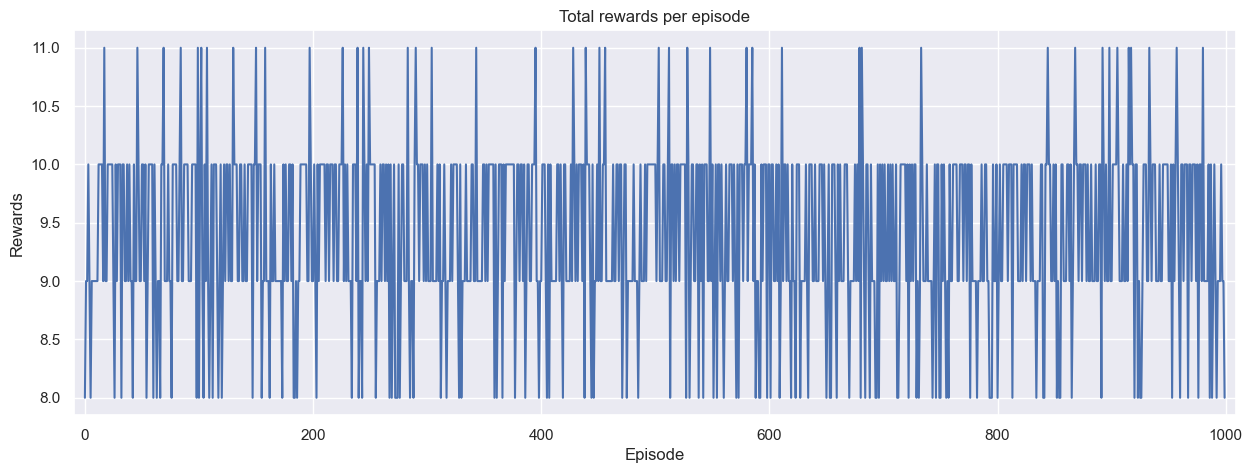

In [27]:

print("Average rewards per episode:", np.mean())

plt.figure(figsize=(15,5))
plt.plot(epi_rewards)
plt.xlabel("Episode")
plt.ylabel("Rewards")
plt.title("Total rewards per episode")
plt.margins(x=0.01)
plt.show()

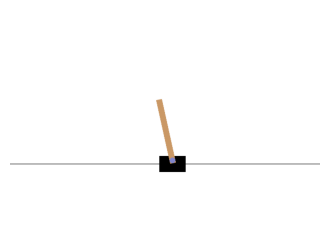

In [32]:
plt.figure(figsize=(4,3))
plt.imshow(env.render())
plt.axis('off')
plt.show()